In [1]:
# 首先加载必用的库
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import re
import jieba # 结巴分词
# gensim用来加载预训练word vector
from gensim.models import KeyedVectors
import warnings
warnings.filterwarnings("ignore")

/home/lihanghang/anaconda3/envs/TensorFlow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
# 使用gensim加载预训练中文分词embedding
cn_model = KeyedVectors.load_word2vec_format('./Chinese-Word-Vectors/sgns.zhihu.bigram', 
                                          binary=False)

In [3]:
# 获得样本的索引，样本存放于两个文件夹中，
import os
pos_txts = os.listdir('./CompanyNewsData/pos')
neg_txts = os.listdir('./CompanyNewsData/neg')
print(cn_model)

In [4]:
print( '样本总共: '+ str(len(pos_txts) + len(neg_txts)) )

样本总共: 16343


In [35]:
# 现在我们将所有的评价内容放置到一个list里

train_texts_orig = [] # 存储所有评价，每例评价为一条string

# 添加完所有样本之后，train_texts_orig为一个含有4000条文本的list
# 其中前7769条文本为正面评价，后7769条为负面评价

for i in range(1000):
    with open('./CompanyNewsData/pos/'+ pos_txts[i], 'r', errors='ignore') as f:
        text = f.read().strip()
        train_texts_orig.append(text)
        f.close()
for i in range(1000):
    with open('./CompanyNewsData/neg/' + neg_txts[i], 'r', errors='ignore') as f:
        text = f.read().strip()
        train_texts_orig.append(text)
        f.close()

In [36]:
len(train_texts_orig)

2000

In [37]:
# 进行分词和tokenize
# train_tokens是一个长长的list，其中含有4000个小list，对应每一条评价
train_tokens = []
for text in train_texts_orig:
    # 去掉标点
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",text)
    # 结巴分词
    cut = jieba.cut(text)
    # 结巴分词的输出结果为一个生成器
    # 把生成器转换为list
    cut_list = [ i for i in cut ]
    for i, word in enumerate(cut_list):
        try:
            # 将词转换为索引index
            cut_list[i] = cn_model.vocab[word].index
        except KeyError:
            # 如果词不在字典中，则输出0
            cut_list[i] = 0
    train_tokens.append(cut_list)

In [38]:
# 获得所有tokens的长度 
num_tokens = [ len(tokens) for tokens in train_tokens ]
num_tokens = np.array(num_tokens)

In [39]:
# 平均tokens的长度
np.mean(num_tokens)

790.948

In [40]:
# 最长的评价tokens的长度
np.max(num_tokens)

13045

In [41]:
# 取tokens平均值并加上两个tokens的标准差，
# 假设tokens长度的分布为正态分布，则max_tokens这个值可以涵盖95%左右的样本
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

2480

In [42]:
# 取tokens的长度为2465时，大约95%的样本被涵盖
# 我们对长度不足的进行padding，超长的进行修剪
np.sum( num_tokens < max_tokens ) / len(num_tokens)

0.9555

In [43]:
# 用来将tokens转换为文本
def reverse_tokens(tokens):
    text = ''
    for i in tokens:
        if i != 0:
            text = text + cn_model.index2word[i]
        else:
            text = text + ' '
    return text

In [44]:
reverse = reverse_tokens(train_tokens[1])

In [45]:
# 经过tokenize再恢复成文本
# 可见标点符号都没有了
reverse

'成为具有中国情怀全球视野的人才不仅能肩负起建设祖国的使命而且能承担 世界为人类作贡献的责任“ 无以 非志无以成学”传授知识是教育的重要功能“要在增长知识见识上下功夫教育引导学生珍惜学习时光心无旁骛求知 增长见识丰富学识沿着求真理悟道理明事理的方向前进”在全国教育大会上习近平总书记的谆谆教导殷殷期许值得为人师者和莘莘学子铭记在心当今时代知识更新的节奏不断加快有学者曾根据放射性元素衰变的原理提出“知识半衰期”说法：一个专业人士的知识如果不更新在“半衰期”后基础知识仍可用但其他一半新知识却已落伍据测算1950年前的知识半衰期为50年21世纪知识的半衰期平均为32年IT高级工程师的仅为18年传统学人“书读完了”的感叹再也不会出现如今的学习没有完成时只有进行时还需保持加速度增长知识见识可以说是一辈子的功夫另一方面教育的普及出版的繁荣互联网的兴盛使得知识获取的成本大大下降“学好数理化”不再成为求知边界通识教育正不断打开知识视野因此若以知识宽度论今天学子可以完胜过去然而广度之外同样需要有深度 反能精读以致“韦编三绝”；诱惑少所以心无旁骛不断钻研将有限的注意力资源用到最有效的地方才会有“铁杵磨成针”的成就因此既要重视知识的宽度也要重视学习的深度在努力扩大知识半径的同时避免陷入平面化的“知识焦虑”落入浅尝辄止的学习路径既有知识的宽度又有知识的深度才能在积累知识的基础上形成卓越的见识当前许多领域深入发展创新的重要性愈发凸显芯片技术如何突破人工智能领域如何推进东西方文化如何更好交融这有赖于“博观而约取厚积而薄发”尽管传授高深知识的使命往往在高等教育但是培养钻研精神却需要从小抓起面对全球化竞争教育者需要引导学生摆脱简单的记诵在 上下功夫；关注知识的积累更注重思维的锤炼换句话说 好的教育既教会学生如何数清掉落的苹果更激发学生思考为何苹果是掉下来而 上天知识传承很重要见识的培育更关键在古汉语中“知”与“识”相连又有别 获取信息是第一层级；识是具备见解是更高层级由 方为智慧一方面正所谓“师父领进门修行在个人”注重把所学知识内化于心形成自己的见解才算得上学懂弄通；而另一方面具备 精的信息筛选力去伪存真的知识鉴别力把握时代大势的洞察力方能在信息爆炸的时代从容不迫从路径上说培养见识离不开课堂但也不能囿于课堂既需要言传更需要鼓励学生在敏于求知勤于学习敢于创新勇于实践的过程中去主动领悟与把握今天谈增长知

In [46]:
# 由此可见每一个词都对应一个长度为300的向量
embedding_dim = 300

In [47]:
# 只使用前20000个词
num_words = 50000
# 初始化embedding_matrix，之后在keras上进行应用
embedding_matrix = np.zeros((num_words, embedding_dim))
# embedding_matrix为一个 [num_words，embedding_dim] 的矩阵
# 维度为 50000 * 300
for i in range(num_words):
    embedding_matrix[i,:] = cn_model[cn_model.index2word[i]]
embedding_matrix = embedding_matrix.astype('float32')
print(embedding_matrix)

[[-8.017840e-01 -1.653400e-01  3.050800e-02 ...  1.065250e-01
   5.534360e-01  4.366500e-01]
 [-6.517470e-01  5.359700e-01  3.402710e-01 ...  8.053990e-01
   1.045930e-01  1.936940e-01]
 [-4.123210e-01  2.282610e-01  2.071140e-01 ...  8.087770e-01
   5.675100e-02  4.523740e-01]
 ...
 [ 5.849840e-01  1.121180e-01 -6.938330e-01 ... -3.760570e-01
   1.203500e-01 -1.059511e+00]
 [ 1.511710e-01 -3.200000e-04 -3.885760e-01 ... -5.988550e-01
   4.273530e-01 -3.922630e-01]
 [-4.536090e-01 -1.813600e-02 -1.306600e-01 ... -6.608000e-02
   3.566680e-01  3.898050e-01]]


In [48]:
# 检查index是否对应，
# 输出300意义为长度为300的embedding向量一一对应
np.sum(cn_model[cn_model.index2word[333]] == embedding_matrix[333] )

300

In [49]:
import tensorflow as tf
from tensorflow.python.framework import graph_util
# embedding_matrix的维度，
# 这个维度为keras的要求，后续会在模型中用到
pad_sequences = tf.contrib.keras.preprocessing.sequence.pad_sequences
embedding_matrix.shape

(50000, 300)

In [50]:
# 进行padding和truncating， 输入的train_tokens是一个list
# 返回的train_pad是一个numpy array
train_pad = pad_sequences(train_tokens, maxlen=max_tokens,
                            padding='pre', truncating='pre')

In [51]:
# 超出五万个词向量的词用0代替# 超出五万个词 
train_pad[ train_pad>=num_words ] = 0

In [52]:

# 可见padding之后前面的tokens全变成0，文本在最后面# 可见padd 
train_pad[13]

array([9061,    3, 8986, ...,  384,  148,  981], dtype=int32)

In [57]:
# 准备target向量，前2000样本为1，后2000为0# 准备targ 
train_target = np.concatenate( (np.ones(1000),np.zeros(1000)) )

In [58]:
# 进行训练和测试样本的分割
from sklearn.model_selection import train_test_split

In [59]:
#80%的样本用来训练，剩余20%用来测试
X_train, X_test, y_train, y_test = train_test_split(train_pad,
                                                    train_target,
                                                    test_size=0.2,
                                                    random_state=12)
print(X_test)

[[    0     0     0 ...  3267   440     0]
 [    0     0     0 ...    88   432   743]
 [    0     0     0 ...  4736 47979  8454]
 ...
 [    0     0     0 ...    19  4221 14348]
 [    0     0     0 ...     0  2933   111]
 [    0     0     0 ...     0  6133     0]]


In [60]:

# 查看训练样本，确认无误# 查看训练样本 
print(reverse_tokens(X_test[0]))
print('class: ',y_test[0])

In [61]:
# 基于CNN进行情感分析


#os.environ["CUDA_VISIBLE_DEVICES"] = "1"
# 清空图
tf.reset_default_graph()
# 定义了3种filter，每种100个
filters_size = [2, 3, 4]
num_filters = 100
# 超参数
BATCH_SIZE = 128
EPOCHES = 50
LEARNING_RATE = 0.001
L2_LAMBDA = 10
KEEP_PROB = 0.8

In [62]:
# X_train, X_test, y_train, y_test 
def get_batch(x, y, batch_size=BATCH_SIZE, shuffle=True):
    assert x.shape[0] == y.shape[0], print("error shape!")
    # shuffle
    if shuffle:
        shuffled_index = np.random.permutation(range(x.shape[0]))

        x = x[shuffled_index]
        y = y[shuffled_index]
    
    # 统计共几个完整的batch
    n_batches = int(x.shape[0] / batch_size)
    
    for i in range(n_batches - 1):
        x_batch = x[i*batch_size: (i+1)*batch_size]
        y_batch = y[i*batch_size: (i+1)*batch_size]
    
        yield x_batch, y_batch

In [63]:
static_embeddings = embedding_matrix
print(static_embeddings)
EMBEDDING_SIZE = embedding_dim
# 句子最大长度
SENTENCE_LIMIT_SIZE = max_tokens

[[-8.017840e-01 -1.653400e-01  3.050800e-02 ...  1.065250e-01
   5.534360e-01  4.366500e-01]
 [-6.517470e-01  5.359700e-01  3.402710e-01 ...  8.053990e-01
   1.045930e-01  1.936940e-01]
 [-4.123210e-01  2.282610e-01  2.071140e-01 ...  8.087770e-01
   5.675100e-02  4.523740e-01]
 ...
 [ 5.849840e-01  1.121180e-01 -6.938330e-01 ... -3.760570e-01
   1.203500e-01 -1.059511e+00]
 [ 1.511710e-01 -3.200000e-04 -3.885760e-01 ... -5.988550e-01
   4.273530e-01 -3.922630e-01]
 [-4.536090e-01 -1.813600e-02 -1.306600e-01 ... -6.608000e-02
   3.566680e-01  3.898050e-01]]


In [64]:
with tf.name_scope("cnn"):
        with tf.name_scope("placeholders"):
            inputs = tf.placeholder(dtype=tf.int32, shape=(None, max_tokens), name="inputs")
            targets = tf.placeholder(dtype=tf.int64, shape=[None], name="targets")
            y_one_hot = tf.one_hot( targets , 1 ) # 正负分类
            print(inputs)
        # embeddings
        with tf.name_scope("embeddings"):
            # embedding_matrixs = tf.Variable(initial_value=static_embeddings, trainable=False, name="embedding_matrixs")
            embed = tf.nn.embedding_lookup(embedding_matrix+1, inputs, name="embed")
            # 添加channel维度
            embed_expanded = tf.expand_dims(embed, -1, name="embed_expand")

        # 用来存储max-pooling的结果
        pooled_outputs = []

        # 迭代多个filter
        for i, filter_size in enumerate(filters_size):
            with tf.name_scope("conv_maxpool_%s" % filter_size):
                filter_shape = [filter_size, EMBEDDING_SIZE, 1, num_filters]
                W = tf.Variable(tf.truncated_normal(filter_shape, mean=0.0, stddev=0.1), name="W")
                b = tf.Variable(tf.zeros(num_filters), name="b")

                conv = tf.nn.conv2d(input=embed_expanded, 
                                     filter=W, 
                                     strides=[1, 1, 1, 1], 
                                     padding="VALID",
                                     name="conv")

                # 激活
                a = tf.nn.relu(tf.nn.bias_add(conv, b), name="activations")
                # 池化
                max_pooling = tf.nn.max_pool(value=a, 
                                        ksize=[1, SENTENCE_LIMIT_SIZE - filter_size + 1, 1, 1],
                                        strides=[1, 1, 1, 1],
                                        padding="VALID",
                                        name="max_pooling")
                pooled_outputs.append(max_pooling)

        # 统计所有的filter
        total_filters = num_filters * len(filters_size)
        total_pool = tf.concat(pooled_outputs, 3)
        flattend_pool = tf.reshape(total_pool, (-1, total_filters))


        # dropout
        with tf.name_scope("dropout"):
            dropout = tf.nn.dropout(flattend_pool, KEEP_PROB)

        # output
        with tf.name_scope("output"):
            W = tf.get_variable("W", shape=(total_filters, 1), initializer=tf.contrib.layers.xavier_initializer())
            b = tf.Variable(tf.zeros(1), name="b")

            logits = tf.add(tf.matmul(dropout, W), b)
            # sigmoid
            predictions = tf.nn.sigmoid(logits, name="predictions")

        # loss
        with tf.name_scope("loss"):
            loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_one_hot, logits=logits))
            loss = loss + L2_LAMBDA * tf.nn.l2_loss(W)
            optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)

        # evaluation
        with tf.name_scope("evaluation"):
            # tf.greater 功能：通过比较a、b两个值的大小来输出对错。大于0.5即输出为负向文本
            correct_preds = tf.equal(tf.cast(tf.greater(predictions, 0.5), tf.float32), y_one_hot)
            accuracy = tf.reduce_sum(tf.reduce_sum(tf.cast(correct_preds, tf.float32), axis=1))

Tensor("cnn/placeholders/inputs:0", shape=(?, 2480), dtype=int32)


In [65]:
# 存储准确率
cnn_train_accuracy = []
cnn_test_accuracy = []

In [66]:
saver = tf.train.Saver()

In [67]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())    
    writer = tf.summary.FileWriter("./graphs/cnn", tf.get_default_graph())
    n_batches = int(X_train.shape[0] / BATCH_SIZE)   
    for epoch in range(EPOCHES):
        total_loss = 0
        for x_batch, y_batch in get_batch(X_train, y_train):
            _, l = sess.run([optimizer, loss],
                            feed_dict={inputs: x_batch, 
                                       targets: y_batch})
            total_loss += l
        
        train_corrects = sess.run(accuracy, feed_dict={inputs: X_train, targets: y_train})
        train_acc = train_corrects / X_train.shape[0]
        cnn_train_accuracy.append(train_acc)
        
        test_corrects = sess.run(accuracy, feed_dict={inputs: X_test, targets: y_test})
        test_acc = test_corrects / X_test.shape[0]
        cnn_test_accuracy.append(test_acc)
        
        print("Training epoch: {}, Training loss: {:.4f}, Train accuracy: {:.4f}, Test accuracy: {:.4f}".format(epoch + 1, 
                                                                                                                total_loss / n_batches,
                                                                                                                train_acc,
                                                                                                               test_acc))
    
    saver.save(sess, "checkpoints/cnn")
    # 保存二进制模型
    const_graph = graph_util.convert_variables_to_constants(sess, sess.graph_def, ['cnn/output/predictions'])
    #output_graph_def = tf.graph_util.convert_variables_to_constants(sess, sess.graph_def, output_node_names=['cnn/output/predictions'])
    with tf.gfile.FastGFile(r'Text_Sentiment.pb', mode='wb') as f:
        f.write(const_graph.SerializeToString())
    writer.close()

Training epoch: 1, Training loss: 12.0919, Train accuracy: 0.5169, Test accuracy: 0.5550
Training epoch: 2, Training loss: 9.3987, Train accuracy: 0.6000, Test accuracy: 0.5850
Training epoch: 3, Training loss: 7.6793, Train accuracy: 0.6400, Test accuracy: 0.6725
Training epoch: 4, Training loss: 6.4196, Train accuracy: 0.7269, Test accuracy: 0.6650
Training epoch: 5, Training loss: 5.3980, Train accuracy: 0.7556, Test accuracy: 0.7250
Training epoch: 6, Training loss: 4.5237, Train accuracy: 0.7937, Test accuracy: 0.7550
Training epoch: 7, Training loss: 3.7995, Train accuracy: 0.8319, Test accuracy: 0.8300
Training epoch: 8, Training loss: 3.1824, Train accuracy: 0.8431, Test accuracy: 0.8225
Training epoch: 9, Training loss: 2.6794, Train accuracy: 0.8638, Test accuracy: 0.8325
Training epoch: 10, Training loss: 2.2321, Train accuracy: 0.8869, Test accuracy: 0.8700
Training epoch: 11, Training loss: 1.8676, Train accuracy: 0.8844, Test accuracy: 0.8700
Training epoch: 12, Training 

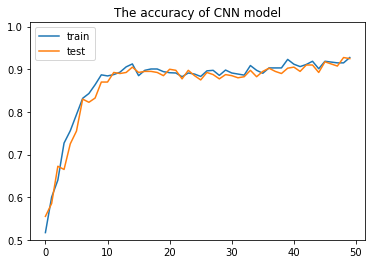

In [69]:
plt.plot(cnn_train_accuracy)
plt.plot(cnn_test_accuracy)
plt.ylim(ymin=0.5, ymax=1.01)
plt.title("The accuracy of CNN model") 
plt.legend(["train", "test"])

In [70]:
# 在test上的准确率
with tf.Session() as sess:
    saver.restore(sess, "checkpoints/cnn")
    feed = {inputs: X_test, targets: y_test}
    total_correct = sess.run(accuracy,
                             feed_dict=feed)
    print("判断正确的文本数量："+ str(total_correct))
    print("测试文本总量："+ str(X_test.shape[0]))
    print("The textCNN model accuracy on test set: {:.2f}%".format(100 * total_correct / X_test.shape[0]))
    preds = sess.run(predictions, feed_dict={inputs: X_test})
    print(len(X_test[0]))
#     for i in range(len(preds)):
#         res = preds[i][0]
#         # print(reverse_tokens(X_test[i]))
#         print('================================原始文本class==========================================: ',y_test[i])
#         if(res>= 0.5):
#             print('===========================是一例负面新闻==================','output=%.2f'%res)
#         else:           
#             print('===========================是一例正面新闻==================','output=%.2f'%res)

INFO:tensorflow:Restoring parameters from checkpoints/cnn
判断正确的文本数量：370.0
测试文本总量：400
The textCNN model accuracy on test set: 92.50%
2480


In [71]:
def predict_sentiment(text):
    # print(text)
    # 去标点
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "", text)
    # 分词
    cut = jieba.cut(text)
    cut_list = [ i for i in cut ]
    # tokenize
    for i, word in enumerate(cut_list):
        try:
            cut_list[i] = cn_model.vocab[word].index
        except KeyError:
            cut_list[i] = 0
    # padding
    tokens_pad = pad_sequences([cut_list], maxlen=max_tokens,
                           padding='pre', truncating='pre')
    # 超出五万个词向量的词用0代替# 超出五万个词 
    tokens_pad[ tokens_pad>=num_words ] = 0
    #print(tokens_pad)
    with tf.Session() as sess:
        saver = tf.train.import_meta_graph('checkpoints/cnn.meta')
        saver.restore(sess, tf.train.latest_checkpoint("checkpoints/"))
        result = sess.run(predictions,feed_dict={inputs: tokens_pad})
        # 预测
        # result = model.predict(x=tokens_pad)
        coef = result[0][0]
        print(coef)
        if coef >= 0.5:
            print('===========================是一例负面新闻==================','output=%.2f'%coef)
        else:
            print('===========================是一例正面新闻==================','output=%.2f'%coef)

In [72]:
text = '''

　　咋维权自如公寓甲醛房事件近日热传
　　租到甲醛房咋进行索赔
　　甲醛超标和致病因果关系认定是难点也是关键点租房时可要求把甲醛检测写进合同
　　近日，“自如甲醛房”刷爆网络，成为热点话题。
　　入职阿里巴巴杭州总部，半年多后因白血病去世，“阿里P7员工租住自如公寓，得白血病病故”被热传。家人检测了其租住的自如公寓，结果显示甲醛超标。家人为了留存证据，缴付了9月的房租，并将公寓用封条贴住，准备提起法律诉讼。
　　实际上，这不是长租公寓平台自如第一次深陷甲醛风波。华商报记者在网上检索“自如甲醛房”，出现1，450，000条相关内容。有多位租客爆料自如等中介收房后快速装修出租，因装修通风期太短、材料等原因导致甲醛超标，租客出现明显病症，身体健康受损。
　　华商报记者检索发现，近三年涉及甲醛超标患癌的案例非常多，有涉及办公室的、有公寓楼的，有租住房的，有私家装修的，也有学校教室的，引发多起法律纠纷，甚至出现过群体性事件。
　　自如被指操纵甲醛检测结果
　　8月30日，自如相关人士回应甲醛超标问题时表示，每套房屋的装修配置不同，通风时长不同，以及季节性气温变化等原因，都会引发甲醛含量变化，并称自如将“从根本上改进”，并在“2018年升级全线产品品质，对标国际标准。”
　　话音未落，9月1日晚，有租户向媒体爆料，自如申请的第三方空气检测结果存在被人为操纵的情形，他曾当场拆穿自如甲醛检测人员对数据做手脚。这位租户表示，第一次检查时检测出甲醛含量0.33mg，国家标准是0.1mg，检测结果为不合格。然后对方就给租住房屋做了“治理”。6天后，第二次检测报告显示，甲醛含量0.03mg，显示为合格。但他发现，现场检测人员干预了检测结果。自如工作人员事后告知他，进行检测的公司“没有认证”。在他的要求下，自如方面另找了一家检测机构，但第三次检测结果显示，甲醛依然超标。最后自如和他签了和解协议，给他赔偿4000元，因担心甲醛危及健康，他最终选择了退租。
　　甲醛超标与致病因果关系难认定
　　西安从事房屋装修的业内人士接受华商报记者采访表示，无论是装修的新房还是租住房，完工后要通风至少3个月。如果再购置家具，晾晒通风的时间则更长。在入住前，都要请专业公司检测甲醛，检测数据可以人为操控。他了解到有客户不放心，要请不同的公司多次检测，“如果是租住公寓，就像媒体报道的自如公寓‘从装修到出租，15天搞定’，为避免类似纠纷，可以要求签合同前检测甲醛。”
　　日前，有媒体以“甲醛+健康权”为关键词，在中国裁判文书网上检索到63份裁判文书，其中10起涉及居住、办公场所因有害物质超标起诉装修、出租方的判例。在这些判例中，原告全部败诉。
　　陕西海普睿诚律师事务所马秉晨律师接受华商报记者采访表示，这类官司之所以难打，因为租住房甲醛超标与租客致病之间的因果关系难认定。有时，原告、被告请专业机构检测的结果不一致。一旦起诉到法院，法院也会委托第三方机构进行检测，但要证明甲醛超标是唯一的致病原因，往往难度很大。
　　>>律师说法
　　可明确要求测甲醛写进合同
　　消费者租住甲醛房，健康受损如何维权？出租房甲醛超标，官司为啥难打？法律学者杨晨作了相关解读。
　　房源检测合格后再出租
　　华商报：类似“自如甲醛房”的官司难打在哪？
　　杨晨：法院判定侵权责任赔偿，甲醛超标和租客身体致病之间的因果关系认定是关键，也是难点。在我国的装修污染中，苯系物与甲醛超标最为广泛。但从科学上看，我们还不能断言“甲醛导致白血病”。世卫组织下属的国际癌症研究局发布的“将甲醛分类为人类致癌物”的新闻公报，来自10个国家的26位科学家综合评估了甲醛致癌性，并得出了核心结论，即甲醛是人类致癌物，可以引起人类鼻咽癌，但甲醛致白血病的证据还不够充分。不过，也有人类流行病学相关研究结果支持“甲醛导致白血病”。
　　华商报：能否以此事件推动国内长租房中介，对房源先行检测合格后再对外出租？
　　杨晨：我认为，将所有房源检测合格后再对外出租，这是国内长租房中介公司应尽的商业责任，也是法律责任。因为《消费者权益保护法》规定，消费者有权要求经营者提供的商品和服务，符合保障人身、财产安全的要求。经媒体报道后，甲醛出租房问题引起公众广泛关注，这是一个很好的解决契机，加强房源检测环节，有利于消费者权益保障，也有助于国内长租房市场健康发展。
　　出租房甲醛超标谁来监管
　　华商报：签订租房合同时，是否可以明确要求把甲醛检测等内容写进合同中？
　　杨晨：根据《室内空气质量标准》、《居室空气中甲醛的卫生标准》规定，室内甲醛应低于0.1毫克每立方米的标准，但没有法律法规和标准明确禁止出租甲醛超标的住房。但我国《合同法》规定，“合同的内容由当事人约定”，“质量”也是合同条款的重要内容。在签订租房合同时，可以明确要求把甲醛检测等空气质量内容写进合同中。立法应当明确规定，甲醛不超标是出租房屋安全性的基本标准之一，严禁甲醛超标房流入租房市场。
　　华商报：中介公司装修出租房屋，甲醛超标等问题谁来监管？
　　杨晨：为了节约成本，有中介公司能省就省，出租房的装修材料容易导致甲醛超标。住建部门不仅承担“规范房地产市场秩序、监督管理房地产市场的责任”，还承担“建筑工程质量安全监管的责任”。中介装修房屋甲醛超标，应当由住建部门来监管。就装修材料的质量问题，应由质检部门来监管。根据《产品质量法》，对生产和故意销售不符合保障人体健康，人身、财产安全的国家标准、行业标准的产品的，“责令停止生产”，“没收违法销售的产品和违法所得，并处违法所得1倍以上5倍以下的罚款，可以吊销营业执照；构成犯罪的，依法追究刑事责任”。
　　检测人员做手脚应受行政处罚
　　华商报：中介公司的检测报告能信吗？如果检测数据造假，谁来监管？
　　杨晨：中介公司是利益关系者，由其出具的检测报告，需要打一个问号，应当由第三方检测机构出具权威报告。根据《产品质量法》第57条，“产品质量检验机构、认证机构伪造检验结果或者出具虚假证明的”，“责令改正，对单位处5万元以上10万元以下的罚款，对直接负责的主管人员和其他直接责任人员处1万元以上5万元以下的罚款”，“有违法所得的，并处没收违法所得”，“情节严重的，取消其检验资格、认证资格”，“构成犯罪的，依法追究刑事责任”。“产品质量检验机构、认证机构出具的检验结果或者证明不实，造成损失的，应当承担相应的赔偿责任”，“造成重大损失的，撤销其检验资格、认证资格”。出现检测数据造假问题，比如甲醛检测人员对数据做手脚，应当受到行政处罚。
　　华商报：租住房屋甲醛超标怎样维权？
　　杨晨：各自的检测结论不一致，应当由具有认证资格的第三方检测机构，按照规定的流程进行检测。出现租住房屋甲醛超标现象，消费者首先要搜集证据，拿到权威性的检测报告，对自身健康造成损害的医学证明等。在此基础上，一是可以解除合同，二是可以提起民事赔偿诉讼，也可以双方协商赔偿。
　　华商报：对承租人健康造成损害的是否可以向房东或中介公司索赔医药费？
　　杨晨：从法律上看，承租人可以提出侵权索赔。我国《侵权责任法》明确规定，“因产品存在缺陷造成他人损害的，生产者应当承担侵权责任”“因产品存在缺陷造成损害的，被侵权人可以向产品的生产者请求赔偿，也可以向产品的销售者请求赔偿”。对承租人健康造成损害的，可以向房东或托管中介索赔医药费。不过在司法实践中，维权有一定难度。虽然有少数胜诉例子，但一般情况下，法院认为白血病的病因尚不完全清楚，不少原告诉讼请求都被驳回。
　　>>以案说法
　　签约后发现甲醛超标
　　租房者告赢中介公司
　　2015年9月，方某与北京某房屋租赁中介公司签订租房合同，随后发现租住屋甲醛超标。当年10月，方某联系该公司工作人员刘某某，以空气状况存在问题为由要求解除合同，刘某某让方某对房屋空气质量自行进行检测。但中介公司未及时有效回应方某解除合同的要求。
　　此后，方某聘请鉴定机构对空气质量进行了鉴定，在收到甲醛超标的鉴定结论后，方某以租住屋甲醛超标损害健康权为由，将该中介公司起诉到法院，要求判令解除租房合同，不承担租金。海淀区法院和北京市一中院，分别作出一审和二审民事判决，判决原告方某胜诉。中介公司不服判决，上诉至北京市高院申请再审。北京市高院审查认为，一、二审法院认定该中介公司对方某委托检测机构出具的检测结论认可，并无不当。2017年8月，北京市高院驳回该中介公司的再审申请，维持原判。华商报记者燕然





责任编辑：陈永乐


'''
predict_sentiment(text)

ValueError: cannot add op with name cnn/conv_maxpool_2/W/Adam as that name is already used

In [ ]:
# 模型测试
import os
testDir = "./CompanyNewsData/test/"
list = os.listdir(testDir) #列出文件夹下所有的目录与文件
for i in range(0,len(list)):
    print(list[i])
    file = open(testDir+list[i], 'r')
    # 读取文件内容
    content = file.read()
    # 将内容送入模型
    predict_sentiment(content)
    file.close()

In [89]:

from tensorflow.python.platform import gfile

text = '''据民警介绍，非法团伙与受害学生签订的借款合同中，存在很多的收费条款，
并且受害学生除了签订意外，根本再无接触合同的可能，合同也仅此一份，签完合同就会被他们拿走
，等到期受害学生还不上时，就以各种条款收取费用，他们虽不会采用身体上的暴力，
但 通过威胁、恐吓、聚众造势等对他们的心里造成极大的压力和恐惧心理，甚至会前往学生的
老家，在家门口泼油漆、写红字等恶劣的方式比他们想办法还钱！'''
text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "", text)
# 分词
cut = jieba.cut(text)
cut_list = [ i for i in cut ]
# tokenize
for i, word in enumerate(cut_list):
    try:
        cut_list[i] = cn_model.vocab[word].index
    except KeyError:
        cut_list[i] = 0
# padding
tokens_pad = pad_sequences([cut_list], maxlen=2480,
                       padding='pre', truncating='pre')
# 超出五万个词向量的词用0代替# 超出五万个词 
tokens_pad[ tokens_pad>=num_words ] = 0 
 


# 输入
with tf.gfile.FastGFile('Text_Sentiment.pb','rb') as f:
    # 复制定义好的计算图到新的图中，先创建一个空的图.
    graph_def = tf.GraphDef()
    # 加载proto-buf中的模型
    graph_def.ParseFromString(f.read())
    # 最后复制pre-def图的到默认图中.
    
    _ = tf.import_graph_def(graph_def, name='')    
with tf.Session() as sess:
    # 初始化所有变量
    init = tf.global_variables_initializer()
    sess.run(init)
    input_x = sess.graph.get_tensor_by_name('cnn/placeholders/inputs:0')
    op = sess.graph.get_tensor_by_name('cnn/output/predictions:0')
    ret = sess.run(op, feed_dict={input_x: tokens_pad})
    finallRes = ret[0][0]
    print(finallRes)

1.9542429e-05


In [90]:
def load_model():
    with tf.Session() as sess:
        saver = tf.train.import_meta_graph('checkpoints/cnn.meta')
        saver.restore(sess, tf.train.latest_checkpoint("model/"))
        print sess.run('w:0')
        print sess.run('b:0')

SyntaxError: invalid syntax (<ipython-input-90-c832f5207257>, line 5)